Importing Necessary Library for Model

In [891]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Store Dataset in dataframe

In [892]:
df = pd.read_excel(r'/content/sydney_rain prediction.xlsx')

In [893]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

Converting date column in datetime Format

In [894]:
# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

Feature Engineering

In [895]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

Removing date column from Dateframe

In [896]:
df.drop('Date', axis=1, inplace=True)
df.drop('Location', axis=1, inplace=True)


Display update dateframe

In [897]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,DayOfWeek
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes,2,1,4
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,2,2,5
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,2,3,6
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,2,4,0
4,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,8.6,19.6,0.0,2.0,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No,6,21,2
3333,9.3,19.2,0.0,2.0,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No,6,22,3
3334,9.4,17.7,0.0,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No,6,23,4
3335,10.1,19.3,0.0,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No,6,24,5


Converting Categorical variable column in dummies variable
1 for 'Yes' and 0 for 'No'

In [898]:
df = pd.get_dummies(df, columns=['RainToday', 'RainTomorrow'], drop_first=True)

Display updated Dataframe

In [899]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month,Day,DayOfWeek,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,2,1,4,1,1
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,2,2,5,1,1
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,2,3,6,1,1
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,2,4,0,1,1
4,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,2,5,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,8.6,19.6,0.0,2.0,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,6,21,2,0,0
3333,9.3,19.2,0.0,2.0,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,6,22,3,0,0
3334,9.4,17.7,0.0,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,6,23,4,0,0
3335,10.1,19.3,0.0,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,6,24,5,0,0


Handling Missing value and fill with the median for all Numeric columns

In [900]:
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

Changing DataType of all in DataFrame

In [901]:
df = df.astype(int)


In [902]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month,Day,DayOfWeek,RainToday_Yes,RainTomorrow_Yes
0,19,22,15,6,0,92,84,1017,1017,8,8,20,20,2,1,4,1,1
1,19,25,6,3,2,83,73,1017,1016,7,7,22,24,2,2,5,1,1
2,21,24,6,2,0,88,86,1016,1015,7,8,23,23,2,3,6,1,1
3,20,22,18,2,0,83,90,1014,1011,8,8,21,20,2,4,0,1,1
4,19,25,77,4,0,88,74,1008,1004,8,8,22,25,2,5,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,8,19,0,2,7,73,52,1025,1025,2,2,10,17,6,21,2,0,0
3333,9,19,0,2,9,78,53,1028,1024,2,2,11,18,6,22,3,0,0
3334,9,17,0,2,2,85,56,1020,1015,6,6,10,17,6,23,4,0,0
3335,10,19,0,1,9,56,35,1017,1015,5,2,12,19,6,24,5,0,0


Display update DataFrame

In [903]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month,Day,DayOfWeek,RainToday_Yes,RainTomorrow_Yes
0,19,22,15,6,0,92,84,1017,1017,8,8,20,20,2,1,4,1,1
1,19,25,6,3,2,83,73,1017,1016,7,7,22,24,2,2,5,1,1
2,21,24,6,2,0,88,86,1016,1015,7,8,23,23,2,3,6,1,1
3,20,22,18,2,0,83,90,1014,1011,8,8,21,20,2,4,0,1,1
4,19,25,77,4,0,88,74,1008,1004,8,8,22,25,2,5,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,8,19,0,2,7,73,52,1025,1025,2,2,10,17,6,21,2,0,0
3333,9,19,0,2,9,78,53,1028,1024,2,2,11,18,6,22,3,0,0
3334,9,17,0,2,2,85,56,1020,1015,6,6,10,17,6,23,4,0,0
3335,10,19,0,1,9,56,35,1017,1015,5,2,12,19,6,24,5,0,0


Standardized DateFrame

In [904]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(df)

In [905]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month,Day,DayOfWeek,RainToday_Yes,RainTomorrow_Yes
0,19,22,15,6,0,92,84,1017,1017,8,8,20,20,2,1,4,1,1
1,19,25,6,3,2,83,73,1017,1016,7,7,22,24,2,2,5,1,1
2,21,24,6,2,0,88,86,1016,1015,7,8,23,23,2,3,6,1,1
3,20,22,18,2,0,83,90,1014,1011,8,8,21,20,2,4,0,1,1
4,19,25,77,4,0,88,74,1008,1004,8,8,22,25,2,5,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,8,19,0,2,7,73,52,1025,1025,2,2,10,17,6,21,2,0,0
3333,9,19,0,2,9,78,53,1028,1024,2,2,11,18,6,22,3,0,0
3334,9,17,0,2,2,85,56,1020,1015,6,6,10,17,6,23,4,0,0
3335,10,19,0,1,9,56,35,1017,1015,5,2,12,19,6,24,5,0,0


In [906]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   MinTemp           3337 non-null   int64
 1   MaxTemp           3337 non-null   int64
 2   Rainfall          3337 non-null   int64
 3   Evaporation       3337 non-null   int64
 4   Sunshine          3337 non-null   int64
 5   Humidity9am       3337 non-null   int64
 6   Humidity3pm       3337 non-null   int64
 7   Pressure9am       3337 non-null   int64
 8   Pressure3pm       3337 non-null   int64
 9   Cloud9am          3337 non-null   int64
 10  Cloud3pm          3337 non-null   int64
 11  Temp9am           3337 non-null   int64
 12  Temp3pm           3337 non-null   int64
 13  Month             3337 non-null   int64
 14  Day               3337 non-null   int64
 15  DayOfWeek         3337 non-null   int64
 16  RainToday_Yes     3337 non-null   int64
 17  RainTomorrow_Yes  3337 non-null  

I am not removing Outliers because it impact my model

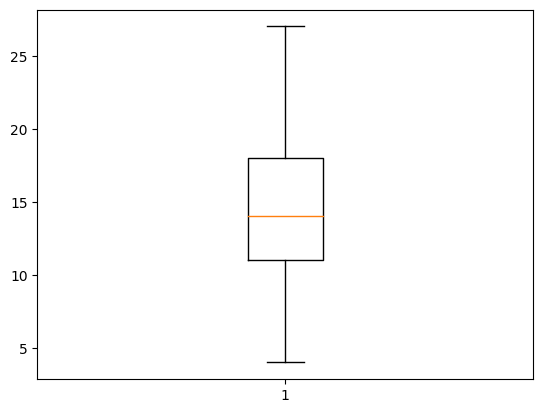

In [907]:
plt.boxplot(df["MinTemp"])
plt.show()


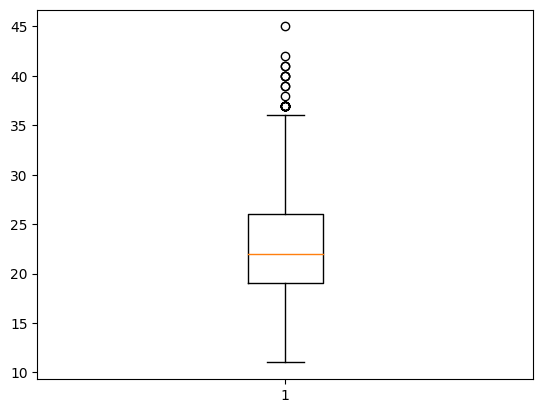

In [908]:
plt.boxplot(df["MaxTemp"])
plt.show()

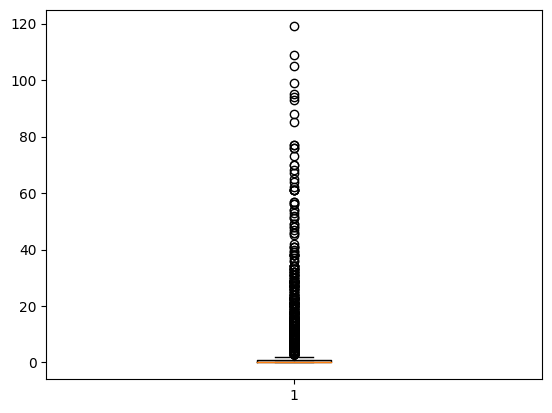

In [909]:
plt.boxplot(df["Rainfall"])
plt.show()

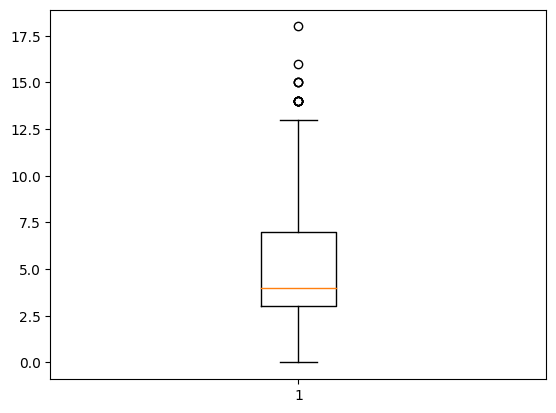

In [910]:
plt.boxplot(df["Evaporation"])
plt.show()

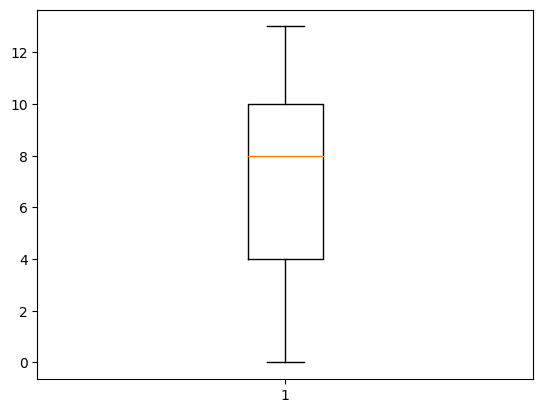

In [911]:
plt.boxplot(df["Sunshine"])
plt.show()

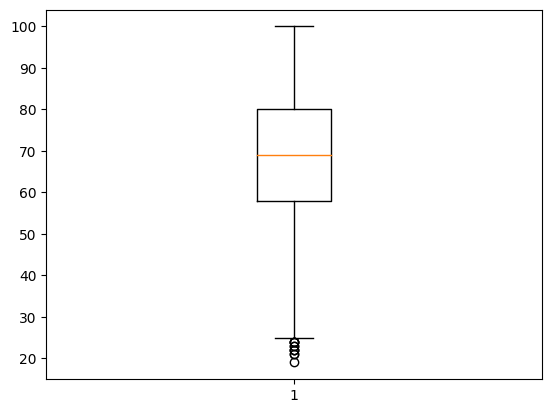

In [912]:
plt.boxplot(df["Humidity9am"])
plt.show()

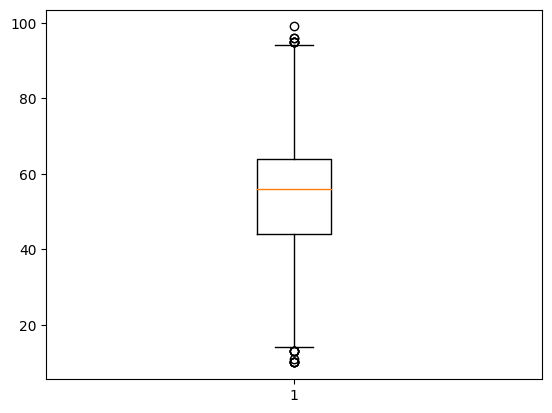

In [913]:
plt.boxplot(df["Humidity3pm"])
plt.show()

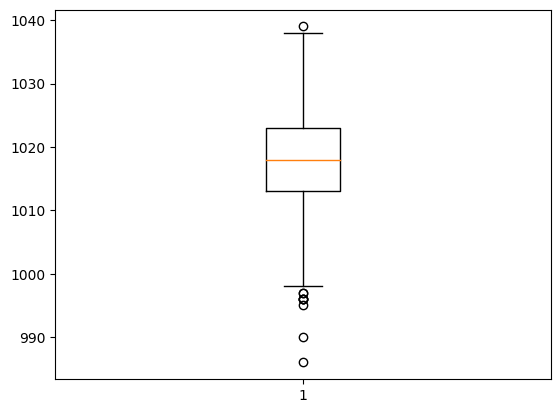

In [914]:
plt.boxplot(df["Pressure9am"])
plt.show()

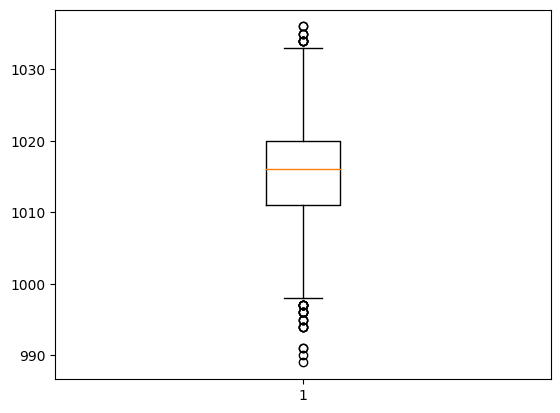

In [915]:
plt.boxplot(df["Pressure3pm"])
plt.show()

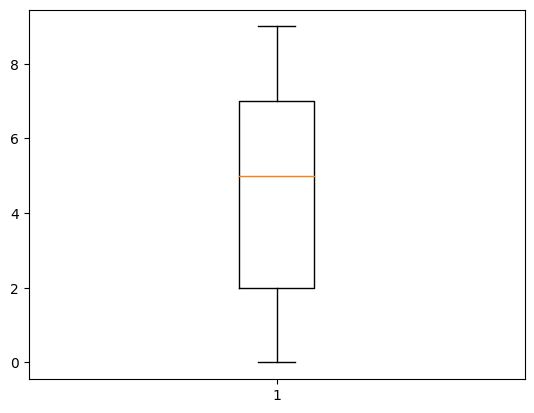

In [916]:
plt.boxplot(df["Cloud9am"])
plt.show()

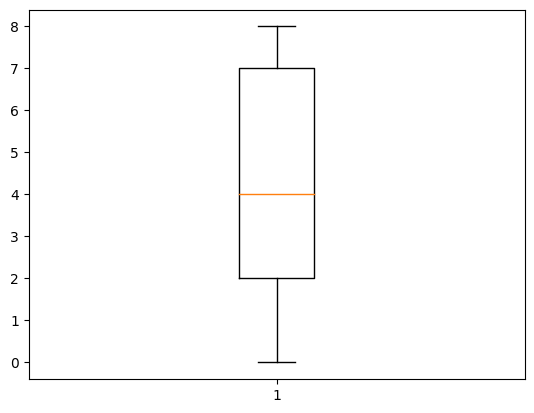

In [917]:
plt.boxplot(df["Cloud3pm"])
plt.show()

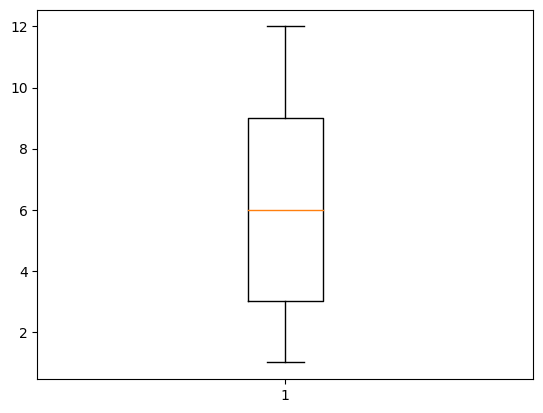

In [918]:
plt.boxplot(df["Month"])
plt.show()

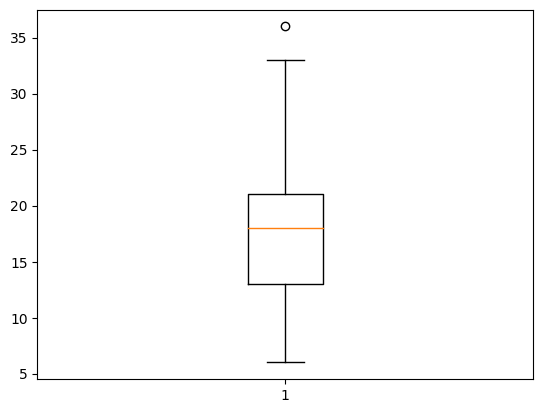

In [919]:
plt.boxplot(df["Temp9am"])
plt.show()

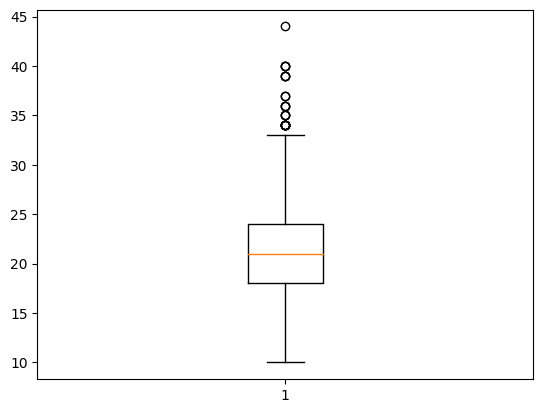

In [920]:
plt.boxplot(df["Temp3pm"])
plt.show()

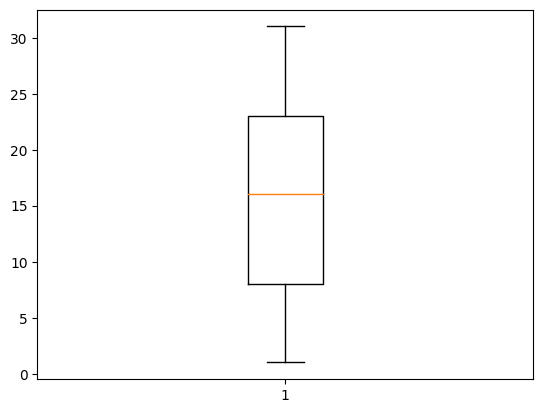

In [921]:
plt.boxplot(df["Day"])
plt.show()

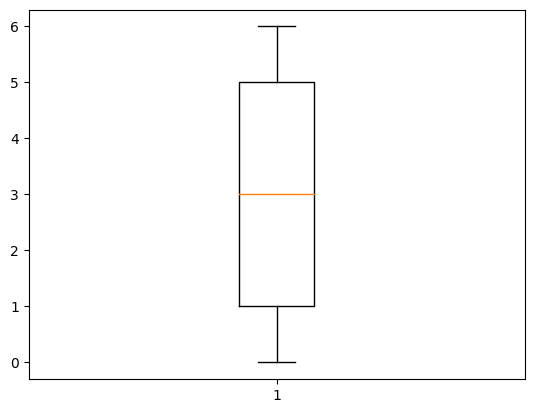

In [922]:
plt.boxplot(df["DayOfWeek"])
plt.show()

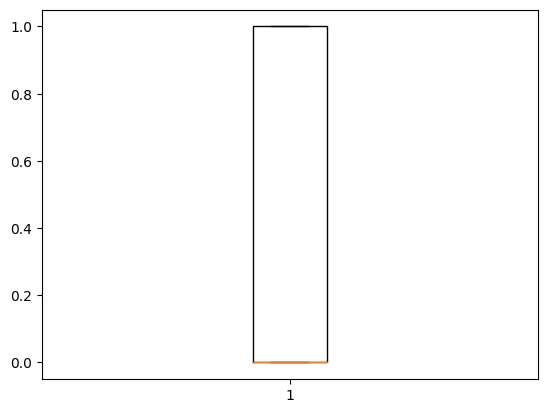

In [923]:
plt.boxplot(df["RainToday_Yes"])
plt.show()

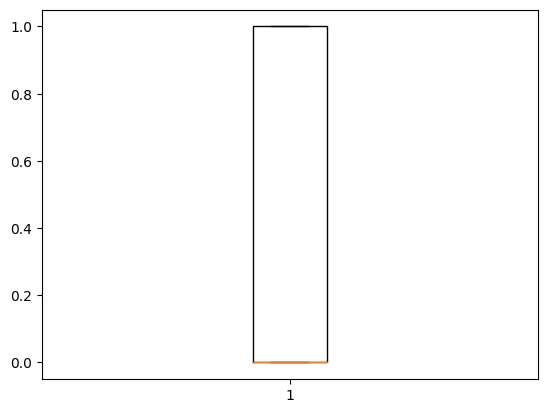

In [924]:
plt.boxplot(df["RainTomorrow_Yes"])
plt.show()

Train Test Split Dataset for Model

In [925]:
# Select features and target variable
X = df.drop('Rainfall', axis=1)  # Features
y = df['Rainfall']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Display distribution of data for train & test to the Model

In [926]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2669, 17) (668, 17) (2669,) (668,)


In [927]:
df['Rainfall']


0       15
1        6
2        6
3       18
4       77
        ..
3332     0
3333     0
3334     0
3335     0
3336     0
Name: Rainfall, Length: 3337, dtype: int64

Calling Models

In [928]:
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()
logistic_classifier = LogisticRegression()

Training Train_DataSet in Models

In [929]:
rf_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
logistic_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Making Predictions

In [930]:
rf_pred = rf_classifier.predict(X_test)
svm_pred = svm_classifier.predict(X_test)
knn_pred = knn_classifier.predict(X_test)
logistic_pred = logistic_classifier.predict(X_test)

Random Forest Classifier Prediction

In [931]:
print("Accuracy:", accuracy_score(y_test, rf_pred))

Accuracy: 0.7619760479041916


SVM prediction

In [932]:
print("Accuracy:", accuracy_score(y_test, svm_pred))

Accuracy: 0.7335329341317365


KNN Prediction

In [933]:
print("Accuracy:", accuracy_score(y_test, knn_pred))

Accuracy: 0.7260479041916168


Logistic Regression Prediction

In [934]:
print("Accuracy:", accuracy_score(y_test, logistic_pred))

Accuracy: 0.7335329341317365


Importing Necessary Library

In [935]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix

Decision Tree Classifier

In [936]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

cm_d = confusion_matrix(y_test, dt_predictions)

Dispaly accuracy on Decision Tree Classifier

In [937]:
print("Accuracy:" , accuracy_score(y_test, dt_predictions))
print('confusion matrix: ', cm_d)

Accuracy: 0.7365269461077845
confusion matrix:  [[484   6   0 ...   0   0   0]
 [  7   3   2 ...   0   0   0]
 [  0   3   2 ...   0   0   1]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


Bagging (Bootstrap Aggregating) with Decision Trees

In [938]:
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                       n_estimators=50, random_state=2)
bagging_classifier.fit(X_train, y_train)
bagging_predictions = bagging_classifier.predict(X_test)
cm_b = confusion_matrix(y_test, bagging_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Display Accuracy on Bagging with Decision Trees

In [939]:
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print("Bagging Classifier Accuracy:", bagging_accuracy)
print('Confusion Matrix : ', cm_b)

Bagging Classifier Accuracy: 0.7634730538922155
Confusion Matrix :  [[490   0   0 ...   0   0   0]
 [  8   5   3 ...   0   0   0]
 [  0   3  12 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


Random Forest Classifier

In [940]:
random_forest_classifier = RandomForestClassifier(n_estimators=50, random_state=2)
random_forest_classifier.fit(X_train, y_train)
rf_predictions = random_forest_classifier.predict(X_test)
cm_rf = confusion_matrix(y_test, rf_predictions)

Display accuracy Random Forest Classifier

In [941]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print('confusion Matrix : ', cm_rf)


Random Forest Classifier Accuracy: 0.7619760479041916
confusion Matrix :  [[490   0   0 ...   0   0   0]
 [  8  10   4 ...   0   0   0]
 [  0   7   6 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


Boosting with AdaBoost

In [942]:
adaboost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                         n_estimators=50, random_state=2)
adaboost_classifier.fit(X_train, y_train)
adaboost_predictions = adaboost_classifier.predict(X_test)
cm_ad = confusion_matrix(y_test, adaboost_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Display accuracy score of Adaboost

In [943]:
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print("AdaBoost Classifier Accuracy:", adaboost_accuracy)
print('confusion matrix : ', cm_ad)

AdaBoost Classifier Accuracy: 0.7634730538922155
confusion matrix :  [[490   0   0 ...   0   0   0]
 [  8  20   0 ...   0   0   0]
 [  0  26   0 ...   0   0   0]
 ...
 [  0   1   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   1   0 ...   0   0   0]]


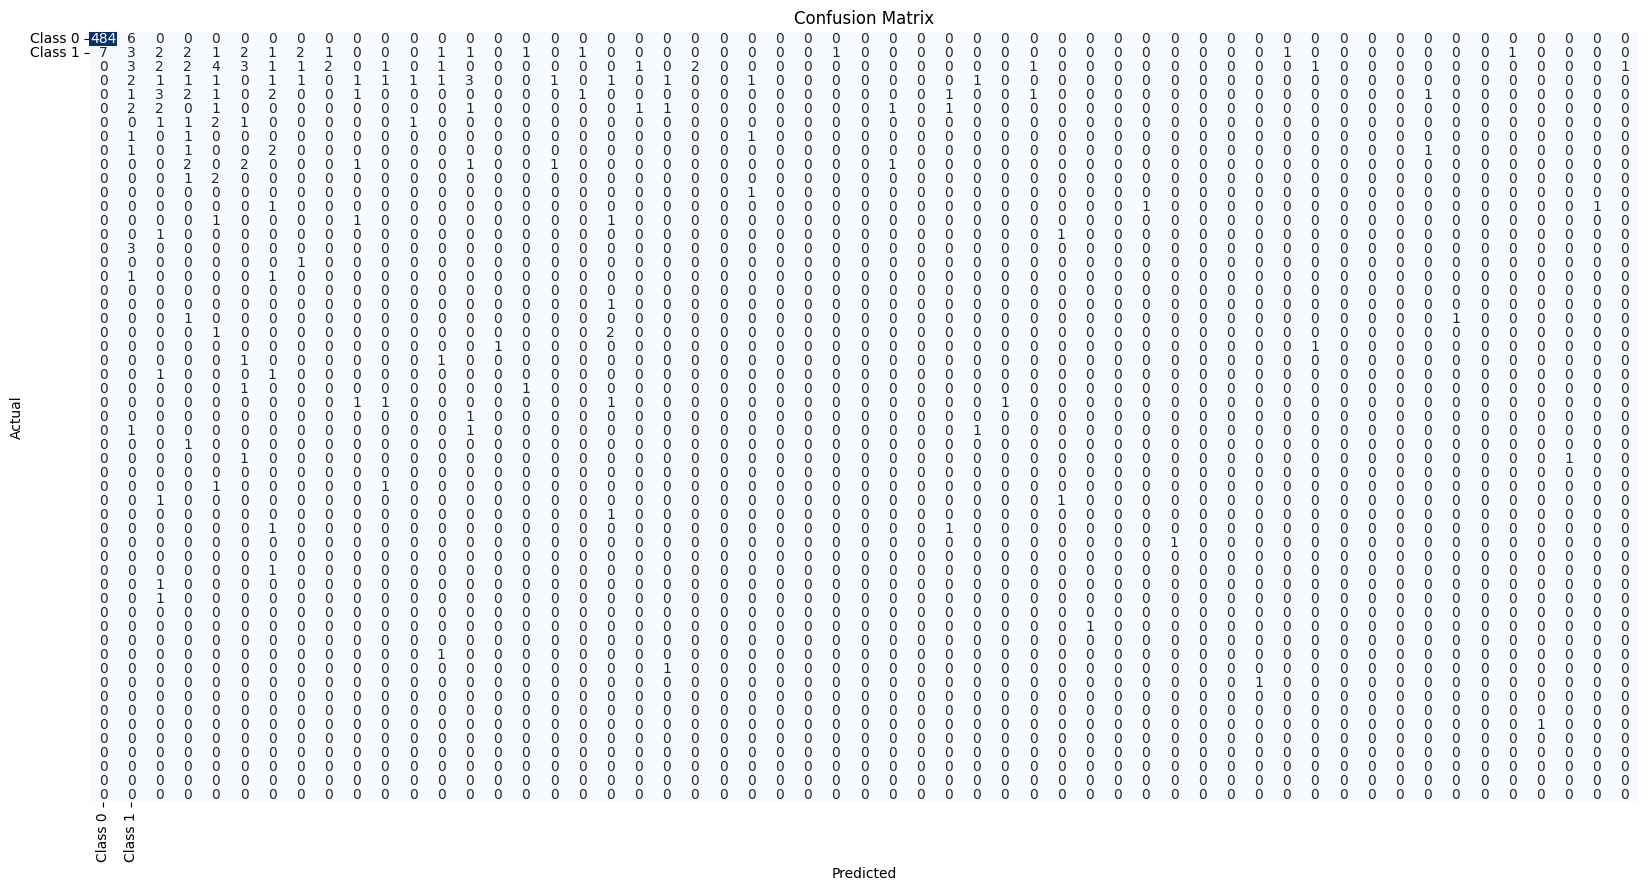

In [944]:
plt.figure(figsize=(20, 10))
sns.heatmap(cm_d, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Q1.Your views about the problem statement?


Data Collection:
You would need a dataset containing historical weather data with features such as temperature, humidity, wind speed, atmospheric pressure, etc. Additionally, the target variable would indicate whether it rained on a particular day.
Data Exploration:

Explore and analyze the dataset to understand the distribution of features and the target variable. Visualizations can help identify patterns and relationships in the data.
Feature Engineering:

Depending on the dataset, you may need to perform feature engineering to extract relevant information from the existing features or create new features that might enhance the model's predictive power.
Model Selection:

Choose various classification models suitable for the problem. Common models include Logistic Regression, Decision Trees, Random Forests, Support Vector Machines, and Gradient Boosting algorithms like XGBoost or LightGBM.
Data Preprocessing:

Handle missing values, outliers, and scale/normalize features as needed. Categorical variables might need encoding, and the dataset should be split into training and testing sets.
Model Training:

Train multiple classification models on the training data. Tune hyperparameters to optimize the performance of each model.
Evaluation:

Evaluate the models using appropriate metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. Consider the balance between false positives and false negatives, as predicting rain when it doesn't rain or vice versa may have different implications.
Ensemble Techniques:

Experiment with ensemble techniques like bagging (Random Forest) and boosting (AdaBoost, XGBoost) to potentially improve model performance.

Q3.What will be your approach to solving this task?




Understanding the Problem:

Clarify the specific goal of the prediction (binary classification for rain or no rain, or multi-class for different levels of rainfall).
Understand the consequences of false positives and false negatives in the context of predicting rainfall.
Data Collection:

Gather historical weather data, including features like temperature, humidity, wind speed, atmospheric pressure, and any other relevant meteorological variables.
Include the target variable indicating whether it rained on a particular day.
Exploratory Data Analysis (EDA):

Explore the dataset to understand the distribution of features, check for missing values, and identify potential correlations.
Visualize the data to gain insights into the relationships between variables.
Data Preprocessing:

Handle missing values, outliers, and duplicate entries.
Convert categorical variables into numerical format using techniques like one-hot encoding or label encoding.
Split the dataset into training and testing sets.
Feature Engineering:

Extract additional features from the existing ones that might capture important information.
Consider creating time-related features, such as day of the week, month, or season, as weather patterns may vary over time.
Model Selection:

Choose a variety of classification models suitable for the problem. Common models include Logistic Regression, Decision Trees, Random Forest, Support Vector Machines, and Gradient Boosting algorithms like XGBoost or LightGBM.
Model Training:

Train each selected model on the training set.
Optimize hyperparameters to improve each model's performance.
Model Evaluation:

Evaluate the models using appropriate metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.
Utilize a confusion matrix to understand the model's performance in terms of true positives, true negatives, false positives, and false negatives.
Ensemble Techniques:

Experiment with ensemble techniques like bagging (Random Forest) and boosting (AdaBoost, XGBoost) to see if combining models enhances predictive performance.

Q3.What were the available ML model options you had to perform this task?

-Logistic Regression,KNN classifier, Descision Tree Classifications, Random Forest classifier , Bagging (bootstrap aggregating) with decision tree, adaboost and many more approach are there .

Q4.. Which model’s performance is best and what could be the possible reason for that?
-- There many models which give very close accuracy and confusion matrix but i choose two  best model amoung them is Random Forest Classifier and Bagging (bootstrap aggregating ) with Decision Tree. reason to choose this models because they are very flexible,fast and with this dataset they suit very well in accuracy.

Q5.What steps can you take to improve this selected model’s performance even further?
-- further steps i will take to improve that i will collect proper data and clean them well. for model i will change hyperparameters and n_estimators and max_depth of decision tree.